# Initial Data Cleaning and Feature Engineering

In [1]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('imdb_data.csv')

In [4]:
df.head()

,Unnamed: 0,title,opn_wknd,gross,budget,runtime,genres,date,mpaa,directors,writers,cast
0,0,Star Wars: Episode VII - The Force Awakens,247966675.0,936662225.0,245000000.0,138.0,"['Action', 'Adventure', 'Sci-Fi']",18 December 2015,PG-13,['J.J. Abrams'],"['Lawrence Kasdan', 'J.J. Abrams', '2 more cre...","['Harrison Ford', 'Mark Hamill', 'Carrie Fishe..."
1,1,Avengers: Endgame,357115007.0,858373000.0,356000000.0,181.0,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",26 April 2019,PG-13,"['Anthony Russo', 'Joe Russo']","['Christopher Markus', 'Stephen McFeely', '14 ...","['Robert Downey Jr.', 'Chris Evans', 'Mark Ruf..."
2,2,Avatar,77025481.0,760507625.0,237000000.0,162.0,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",18 December 2009,PG-13,['James Cameron'],['James Cameron'],"['Sam Worthington', 'Zoe Saldana', 'Sigourney ..."
3,3,Black Panther,202003951.0,700426566.0,200000000.0,134.0,"['Action', 'Adventure', 'Sci-Fi']",16 February 2018,PG-13,['Ryan Coogler'],"['Ryan Coogler', 'Joe Robert Cole', '2 more cr...","['Chadwick Boseman', 'Michael B. Jordan', ""Lup..."
4,4,Avengers: Infinity War,257698183.0,678815482.0,321000000.0,149.0,"['Action', 'Adventure', 'Sci-Fi']",27 April 2018,PG-13,"['Anthony Russo', 'Joe Russo']","['Christopher Markus', 'Stephen McFeely', '14 ...","['Robert Downey Jr.', 'Chris Hemsworth', 'Mark..."


In [5]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,title,opn_wknd,gross,budget,runtime,genres,date,mpaa,directors,writers,cast
0,Star Wars: Episode VII - The Force Awakens,247966675.0,936662225.0,245000000.0,138.0,"['Action', 'Adventure', 'Sci-Fi']",18 December 2015,PG-13,['J.J. Abrams'],"['Lawrence Kasdan', 'J.J. Abrams', '2 more cre...","['Harrison Ford', 'Mark Hamill', 'Carrie Fishe..."
1,Avengers: Endgame,357115007.0,858373000.0,356000000.0,181.0,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",26 April 2019,PG-13,"['Anthony Russo', 'Joe Russo']","['Christopher Markus', 'Stephen McFeely', '14 ...","['Robert Downey Jr.', 'Chris Evans', 'Mark Ruf..."
2,Avatar,77025481.0,760507625.0,237000000.0,162.0,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",18 December 2009,PG-13,['James Cameron'],['James Cameron'],"['Sam Worthington', 'Zoe Saldana', 'Sigourney ..."
3,Black Panther,202003951.0,700426566.0,200000000.0,134.0,"['Action', 'Adventure', 'Sci-Fi']",16 February 2018,PG-13,['Ryan Coogler'],"['Ryan Coogler', 'Joe Robert Cole', '2 more cr...","['Chadwick Boseman', 'Michael B. Jordan', ""Lup..."
4,Avengers: Infinity War,257698183.0,678815482.0,321000000.0,149.0,"['Action', 'Adventure', 'Sci-Fi']",27 April 2018,PG-13,"['Anthony Russo', 'Joe Russo']","['Christopher Markus', 'Stephen McFeely', '14 ...","['Robert Downey Jr.', 'Chris Hemsworth', 'Mark..."


dropping all rows with nan values for gross, budget, opn_wknd, and runtime

In [6]:
df.drop(df[pd.isna(df['gross'])].index, inplace=True)
df.drop(df[pd.isna(df['budget'])].index, inplace=True)
df.drop(df[pd.isna(df['opn_wknd'])].index, inplace=True)
df.drop(df[pd.isna(df['runtime'])].index, inplace=True)

In [7]:
len(df)

2365

2 movies grossed under 1 million and could pose a problem as outliers, so we drop those:

In [8]:
df.drop(df[df['gross'] <= 1000000].index, inplace=True)

In [9]:
len(df)

2363

taking care of incorrect values for mpaa:

In [10]:
df.loc[df[df['mpaa'] == 'for'].index, 'mpaa'] = 'PG-13'
df.loc[df[df['mpaa'] == 'PG-'].index, 'mpaa'] = 'PG-13'
df.loc[df[df['mpaa'] == 'Rated'].index, 'mpaa'] = 'PG-13'

Then we turn mpaa into dummies:

In [11]:
df = pd.concat([df, pd.get_dummies(df['mpaa'])], axis=1)
df.drop(columns=['mpaa'], inplace=True)

In [12]:
df.head()

,title,opn_wknd,gross,budget,runtime,genres,date,directors,writers,cast,PG,PG-13,R
0,Star Wars: Episode VII - The Force Awakens,247966675.0,936662225.0,245000000.0,138.0,"['Action', 'Adventure', 'Sci-Fi']",18 December 2015,['J.J. Abrams'],"['Lawrence Kasdan', 'J.J. Abrams', '2 more cre...","['Harrison Ford', 'Mark Hamill', 'Carrie Fishe...",0,1,0
1,Avengers: Endgame,357115007.0,858373000.0,356000000.0,181.0,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",26 April 2019,"['Anthony Russo', 'Joe Russo']","['Christopher Markus', 'Stephen McFeely', '14 ...","['Robert Downey Jr.', 'Chris Evans', 'Mark Ruf...",0,1,0
2,Avatar,77025481.0,760507625.0,237000000.0,162.0,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",18 December 2009,['James Cameron'],['James Cameron'],"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...",0,1,0
3,Black Panther,202003951.0,700426566.0,200000000.0,134.0,"['Action', 'Adventure', 'Sci-Fi']",16 February 2018,['Ryan Coogler'],"['Ryan Coogler', 'Joe Robert Cole', '2 more cr...","['Chadwick Boseman', 'Michael B. Jordan', ""Lup...",0,1,0
4,Avengers: Infinity War,257698183.0,678815482.0,321000000.0,149.0,"['Action', 'Adventure', 'Sci-Fi']",27 April 2018,"['Anthony Russo', 'Joe Russo']","['Christopher Markus', 'Stephen McFeely', '14 ...","['Robert Downey Jr.', 'Chris Hemsworth', 'Mark...",0,1,0


Converting genres from strings of lists to lists, then turning genres into dummies:

In [13]:
df.loc[df.index, 'genres'] = df.loc[df.index, 'genres'].apply(ast.literal_eval)
df = pd.concat([df, pd.get_dummies(df['genres'].explode()).groupby(level=0).sum()], axis=1)
df.drop(columns=['genres'], inplace=True)

In [14]:
df.loc[df.index, 'date'] = pd.to_datetime(df.loc[df.index, 'date'])
df['days'] = (date.today() - df['date'].dt.date).dt.days

In [15]:
df.head()

,title,opn_wknd,gross,budget,runtime,date,directors,writers,cast,PG,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,days
0,Star Wars: Episode VII - The Force Awakens,247966675.0,936662225.0,245000000.0,138.0,2015-12-18,['J.J. Abrams'],"['Lawrence Kasdan', 'J.J. Abrams', '2 more cre...","['Harrison Ford', 'Mark Hamill', 'Carrie Fishe...",0,...,0,0,0,0,1,0,0,0,0,1759
1,Avengers: Endgame,357115007.0,858373000.0,356000000.0,181.0,2019-04-26,"['Anthony Russo', 'Joe Russo']","['Christopher Markus', 'Stephen McFeely', '14 ...","['Robert Downey Jr.', 'Chris Evans', 'Mark Ruf...",0,...,0,0,0,0,1,0,0,0,0,534
2,Avatar,77025481.0,760507625.0,237000000.0,162.0,2009-12-18,['James Cameron'],['James Cameron'],"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...",0,...,0,0,0,0,1,0,0,0,0,3950
3,Black Panther,202003951.0,700426566.0,200000000.0,134.0,2018-02-16,['Ryan Coogler'],"['Ryan Coogler', 'Joe Robert Cole', '2 more cr...","['Chadwick Boseman', 'Michael B. Jordan', ""Lup...",0,...,0,0,0,0,1,0,0,0,0,968
4,Avengers: Infinity War,257698183.0,678815482.0,321000000.0,149.0,2018-04-27,"['Anthony Russo', 'Joe Russo']","['Christopher Markus', 'Stephen McFeely', '14 ...","['Robert Downey Jr.', 'Chris Hemsworth', 'Mark...",0,...,0,0,0,0,1,0,0,0,0,898


Lets plot gross revenue against budget and see if we can find a relationship. We'll also separate older and younger movies:

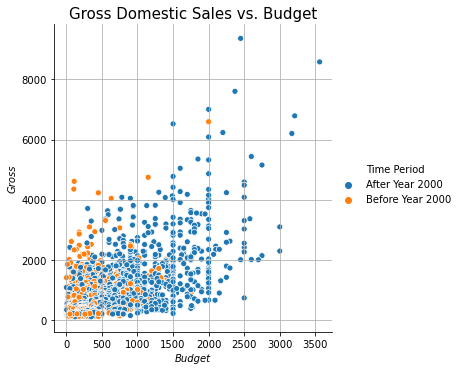

In [16]:
df['Time Period'] = np.where(df['date'].dt.year < 2000, 'Before Year 2000', 'After Year 2000')
df['gross'] = df['gross'] / 100000
df['budget'] = df['budget'] / 100000
sns.relplot(data = df, x='budget', y='gross', hue='Time Period')
plt.xlabel('Budget', fontsize = 10, style = 'italic')
plt.ylabel('Gross',fontsize = 10, style = 'italic')
plt.title('Gross Domestic Sales vs. Budget',fontsize = 15,)
plt.grid()

In [17]:
df.head()

,title,opn_wknd,gross,budget,runtime,date,directors,writers,cast,PG,...,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,days,Time Period
0,Star Wars: Episode VII - The Force Awakens,247966675.0,9366.62225,2450.0,138.0,2015-12-18,['J.J. Abrams'],"['Lawrence Kasdan', 'J.J. Abrams', '2 more cre...","['Harrison Ford', 'Mark Hamill', 'Carrie Fishe...",0,...,0,0,0,1,0,0,0,0,1759,After Year 2000
1,Avengers: Endgame,357115007.0,8583.73000,3560.0,181.0,2019-04-26,"['Anthony Russo', 'Joe Russo']","['Christopher Markus', 'Stephen McFeely', '14 ...","['Robert Downey Jr.', 'Chris Evans', 'Mark Ruf...",0,...,0,0,0,1,0,0,0,0,534,After Year 2000
2,Avatar,77025481.0,7605.07625,2370.0,162.0,2009-12-18,['James Cameron'],['James Cameron'],"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...",0,...,0,0,0,1,0,0,0,0,3950,After Year 2000
3,Black Panther,202003951.0,7004.26566,2000.0,134.0,2018-02-16,['Ryan Coogler'],"['Ryan Coogler', 'Joe Robert Cole', '2 more cr...","['Chadwick Boseman', 'Michael B. Jordan', ""Lup...",0,...,0,0,0,1,0,0,0,0,968,After Year 2000
4,Avengers: Infinity War,257698183.0,6788.15482,3210.0,149.0,2018-04-27,"['Anthony Russo', 'Joe Russo']","['Christopher Markus', 'Stephen McFeely', '14 ...","['Robert Downey Jr.', 'Chris Hemsworth', 'Mark...",0,...,0,0,0,1,0,0,0,0,898,After Year 2000


In [18]:
df.drop(columns=['Time Period'], inplace=True)
df.drop(columns=['date'], inplace=True)

In [19]:
df.head()

,title,opn_wknd,gross,budget,runtime,directors,writers,cast,PG,PG-13,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,days
0,Star Wars: Episode VII - The Force Awakens,247966675.0,9366.62225,2450.0,138.0,['J.J. Abrams'],"['Lawrence Kasdan', 'J.J. Abrams', '2 more cre...","['Harrison Ford', 'Mark Hamill', 'Carrie Fishe...",0,1,...,0,0,0,0,1,0,0,0,0,1759
1,Avengers: Endgame,357115007.0,8583.73000,3560.0,181.0,"['Anthony Russo', 'Joe Russo']","['Christopher Markus', 'Stephen McFeely', '14 ...","['Robert Downey Jr.', 'Chris Evans', 'Mark Ruf...",0,1,...,0,0,0,0,1,0,0,0,0,534
2,Avatar,77025481.0,7605.07625,2370.0,162.0,['James Cameron'],['James Cameron'],"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...",0,1,...,0,0,0,0,1,0,0,0,0,3950
3,Black Panther,202003951.0,7004.26566,2000.0,134.0,['Ryan Coogler'],"['Ryan Coogler', 'Joe Robert Cole', '2 more cr...","['Chadwick Boseman', 'Michael B. Jordan', ""Lup...",0,1,...,0,0,0,0,1,0,0,0,0,968
4,Avengers: Infinity War,257698183.0,6788.15482,3210.0,149.0,"['Anthony Russo', 'Joe Russo']","['Christopher Markus', 'Stephen McFeely', '14 ...","['Robert Downey Jr.', 'Chris Hemsworth', 'Mark...",0,1,...,0,0,0,0,1,0,0,0,0,898


## Feature Engineering Directors, Writers, and Cast

First, we need to convert each feature from strings to lists:

In [20]:
df.loc[df.index, 'directors'] = df.loc[df.index, 'directors'].apply(ast.literal_eval)
df.loc[df.index, 'writers'] = df.loc[df.index, 'writers'].apply(ast.literal_eval)
df.loc[df.index, 'cast'] = df.loc[df.index, 'cast'].apply(ast.literal_eval)

### Directors

Dropping incorrect values for directors:

In [21]:
nums = []
for i in range(0, 11):
    nums.append(str(i))
[x.pop(-1) for x in df.loc[df.index, 'directors'] if x[-1].split()[0] in nums]

['1 more credit',
 '1 more credit',
 '1 more credit',
 '1 more credit',
 '3 more credits',
 '1 more credit',
 '1 more credit',
 '1 more credit',
 '1 more credit',
 '2 more credits',
 '1 more credit',
 '1 more credit',
 '1 more credit',
 '1 more credit',
 '1 more credit',
 '1 more credit',
 '1 more credit',
 '5 more credits',
 '1 more credit',
 '1 more credit',
 '1 more credit',
 '4 more credits',
 '1 more credit',
 '1 more credit',
 '2 more credits',
 '1 more credit',
 '2 more credits',
 '2 more credits',
 '3 more credits',
 '10 more credits',
 '6 more credits',
 '1 more credit',
 '1 more credit']

Getting each directors mean opn_wknd and sorting them:

In [22]:
dir_means = df.loc[df.index, ['opn_wknd', 'directors']].explode('directors').groupby('directors').mean()
dir_means.sort_values('opn_wknd', inplace=True)

In [23]:
dir_means['dir_rank'] = list(range(0, len(dir_means)))
dir_means.reset_index(level=0, inplace=True)

Assigning movies rank based off top director:

In [24]:
df_exp = df.explode('directors')
df_merge = df_exp.merge(dir_means, left_on='directors', right_on = 'directors')
df_merge = df_merge[['title', 'opn_wknd_x', 'dir_rank']].groupby('title').max()

Plotting director ranks:

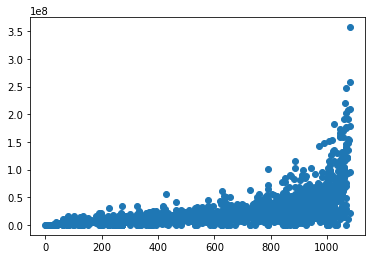

In [25]:
plt.scatter(df_merge['dir_rank'], df_merge['opn_wknd_x'])

In [26]:
df = df.merge(df_merge[['dir_rank']], left_on='title', right_on='title')

In [27]:
corr_matrix = df.corr()
corr_matrix

,opn_wknd,gross,budget,runtime,PG,PG-13,R,Action,Adventure,Animation,...,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,days,dir_rank
opn_wknd,1.000000,0.835166,0.675458,0.220668,0.090277,0.230006,-0.148270,0.247276,0.360488,0.111065,...,-0.005701,-0.058385,-0.133936,0.205759,-0.013336,-0.094883,-0.044732,-0.028692,-0.353378,0.559126
gross,0.835166,1.000000,0.595171,0.302824,0.128652,0.143492,-0.196978,0.166278,0.350555,0.178181,...,0.091723,-0.117965,-0.074994,0.124075,-0.002889,-0.194295,0.012568,-0.006527,-0.163026,0.486840
budget,0.675458,0.595171,1.000000,0.321621,0.183403,0.263636,-0.227924,0.360345,0.515102,0.198045,...,0.027547,-0.123426,-0.155074,0.254530,-0.018640,-0.117688,0.010310,0.040564,-0.364868,0.511367
runtime,0.220668,0.302824,0.321621,1.000000,-0.187645,0.132010,0.080665,0.155967,0.038400,-0.299934,...,-0.036888,-0.025970,0.044906,0.025781,0.036326,0.014112,0.165989,0.113311,0.013040,0.108820
PG,0.090277,0.128652,0.183403,-0.187645,1.000000,-0.333944,-0.291646,-0.096569,0.317698,0.429974,...,0.106807,-0.083791,-0.036794,0.037959,0.050906,-0.275304,-0.062550,-0.015889,-0.147215,0.146000
PG-13,0.230006,0.143492,0.263636,0.132010,-0.333944,1.000000,-0.509837,0.162550,0.039476,-0.221893,...,-0.076940,-0.000946,0.134066,0.110507,0.022758,0.022614,-0.004202,0.005506,-0.269746,0.227088
R,-0.148270,-0.196978,-0.227924,0.080665,-0.291646,-0.509837,1.000000,-0.019976,-0.314711,-0.200837,...,-0.104190,0.139047,-0.144942,-0.114920,-0.080861,0.258439,0.081204,0.003165,-0.106993,-0.106082
Action,0.247276,0.166278,0.360345,0.155967,-0.096569,0.162550,-0.019976,1.000000,0.339017,-0.109455,...,-0.121995,-0.121145,-0.267001,0.344901,-0.048550,0.240725,0.035813,0.042425,-0.072893,0.216728
Adventure,0.360488,0.350555,0.515102,0.038400,0.317698,0.039476,-0.314711,0.339017,1.000000,0.366418,...,0.079028,-0.121065,-0.176559,0.301574,-0.047118,-0.132765,-0.025223,0.044932,-0.120154,0.295315
Animation,0.111065,0.178181,0.198045,-0.299934,0.429974,-0.221893,-0.200837,-0.109455,0.366418,1.000000,...,0.295744,-0.074031,-0.060053,0.001032,0.005070,-0.221016,-0.030570,-0.006414,-0.068832,0.158990


### Writers

First, we drop some incorrect values:

In [28]:
nums = []
for i in range(0, 40):
    nums.append(str(i))    
[x.pop(-1) for x in df.loc[df.index, 'writers'] if x[-1].split()[0] in nums]

['2 more credits',
 '14 more credits',
 '2 more credits',
 '14 more credits',
 '5 more credits',
 '1 more credit',
 '3 more credits',
 '3 more credits',
 '5 more credits',
 '4 more credits',
 '3 more credits',
 '6 more credits',
 '1 more credit',
 '4 more credits',
 '1 more credit',
 '3 more credits',
 '6 more credits',
 '2 more credits',
 '2 more credits',
 '9 more credits',
 '1 more credit',
 '1 more credit',
 '1 more credit',
 '2 more credits',
 '11 more credits',
 '2 more credits',
 '4 more credits',
 '2 more credits',
 '3 more credits',
 '2 more credits',
 '5 more credits',
 '5 more credits',
 '10 more credits',
 '9 more credits',
 '5 more credits',
 '1 more credit',
 '3 more credits',
 '6 more credits',
 '3 more credits',
 '2 more credits',
 '2 more credits',
 '4 more credits',
 '3 more credits',
 '1 more credit',
 '4 more credits',
 '1 more credit',
 '4 more credits',
 '2 more credits',
 '3 more credits',
 '1 more credit',
 '2 more credits',
 '2 more credits',
 '4 more credits',

Getting each writers mean opn_wknd and sorting them:

In [29]:
wri_means = df.loc[df.index, ['opn_wknd', 'writers']].explode('writers').groupby('writers').mean()
wri_means.sort_values('opn_wknd', inplace=True)

In [30]:
wri_means['wri_rank'] = list(range(0, len(wri_means)))
wri_means.reset_index(level=0, inplace=True)

Assinging movies a rank based on their best writer:

In [31]:
df_exp = df.explode('writers')
df_merge = df_exp.merge(wri_means, left_on='writers', right_on = 'writers')
df_merge = df_merge[['title', 'opn_wknd_x', 'wri_rank']].groupby('title').max()

Plotting writer ranks:

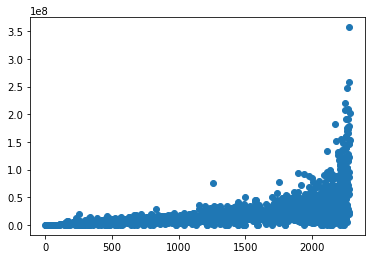

In [32]:
plt.scatter(df_merge['wri_rank'], df_merge['opn_wknd_x'])

In [33]:
df = df.merge(df_merge[['wri_rank']], left_on='title', right_on='title')

In [34]:
corr_matrix = df.corr()
corr_matrix

,opn_wknd,gross,budget,runtime,PG,PG-13,R,Action,Adventure,Animation,...,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,days,dir_rank,wri_rank
opn_wknd,1.000000,0.835166,0.675458,0.220668,0.090277,0.230006,-0.148270,0.247276,0.360488,0.111065,...,-0.058385,-0.133936,0.205759,-0.013336,-0.094883,-0.044732,-0.028692,-0.353378,0.559126,0.567699
gross,0.835166,1.000000,0.595171,0.302824,0.128652,0.143492,-0.196978,0.166278,0.350555,0.178181,...,-0.117965,-0.074994,0.124075,-0.002889,-0.194295,0.012568,-0.006527,-0.163026,0.486840,0.477006
budget,0.675458,0.595171,1.000000,0.321621,0.183403,0.263636,-0.227924,0.360345,0.515102,0.198045,...,-0.123426,-0.155074,0.254530,-0.018640,-0.117688,0.010310,0.040564,-0.364868,0.511367,0.531471
runtime,0.220668,0.302824,0.321621,1.000000,-0.187645,0.132010,0.080665,0.155967,0.038400,-0.299934,...,-0.025970,0.044906,0.025781,0.036326,0.014112,0.165989,0.113311,0.013040,0.108820,0.098853
PG,0.090277,0.128652,0.183403,-0.187645,1.000000,-0.333944,-0.291646,-0.096569,0.317698,0.429974,...,-0.083791,-0.036794,0.037959,0.050906,-0.275304,-0.062550,-0.015889,-0.147215,0.146000,0.111411
PG-13,0.230006,0.143492,0.263636,0.132010,-0.333944,1.000000,-0.509837,0.162550,0.039476,-0.221893,...,-0.000946,0.134066,0.110507,0.022758,0.022614,-0.004202,0.005506,-0.269746,0.227088,0.233355
R,-0.148270,-0.196978,-0.227924,0.080665,-0.291646,-0.509837,1.000000,-0.019976,-0.314711,-0.200837,...,0.139047,-0.144942,-0.114920,-0.080861,0.258439,0.081204,0.003165,-0.106993,-0.106082,-0.107509
Action,0.247276,0.166278,0.360345,0.155967,-0.096569,0.162550,-0.019976,1.000000,0.339017,-0.109455,...,-0.121145,-0.267001,0.344901,-0.048550,0.240725,0.035813,0.042425,-0.072893,0.216728,0.258705
Adventure,0.360488,0.350555,0.515102,0.038400,0.317698,0.039476,-0.314711,0.339017,1.000000,0.366418,...,-0.121065,-0.176559,0.301574,-0.047118,-0.132765,-0.025223,0.044932,-0.120154,0.295315,0.304441
Animation,0.111065,0.178181,0.198045,-0.299934,0.429974,-0.221893,-0.200837,-0.109455,0.366418,1.000000,...,-0.074031,-0.060053,0.001032,0.005070,-0.221016,-0.030570,-0.006414,-0.068832,0.158990,0.131821


### Cast

Getting each cast member's mean opn_wknd and sorting them:

In [35]:
cast_means = df.loc[df.index, ['opn_wknd', 'cast']].explode('cast').groupby('cast').mean()
cast_means.sort_values('opn_wknd', inplace=True)

In [36]:
cast_means['cast_rank'] = list(range(0, len(cast_means)))
cast_means.reset_index(level=0, inplace=True)

Assigning movies a rank based off their best actor:

In [37]:
df_exp = df.explode('cast')
df_merge = df_exp.merge(cast_means, left_on='cast', right_on = 'cast')
df_merge = df_merge[['title', 'opn_wknd_x', 'cast_rank']].groupby('title').max()

Plotting cast ranks:

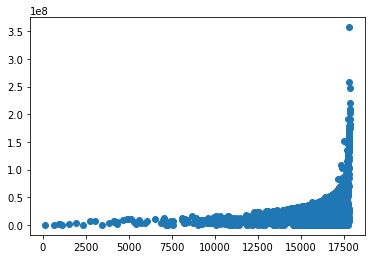

In [38]:
plt.scatter(df_merge['cast_rank'], df_merge['opn_wknd_x'])

In [39]:
df = df.merge(df_merge[['cast_rank']], left_on='title', right_on='title')

In [40]:
corr_matrix = df.corr()
corr_matrix

,opn_wknd,gross,budget,runtime,PG,PG-13,R,Action,Adventure,Animation,...,Romance,Sci-Fi,Sport,Thriller,War,Western,days,dir_rank,wri_rank,cast_rank
opn_wknd,1.000000,0.835166,0.675458,0.220668,0.090277,0.230006,-0.148270,0.247276,0.360488,0.111065,...,-0.133936,0.205759,-0.013336,-0.094883,-0.044732,-0.028692,-0.353378,0.559126,0.567699,0.361156
gross,0.835166,1.000000,0.595171,0.302824,0.128652,0.143492,-0.196978,0.166278,0.350555,0.178181,...,-0.074994,0.124075,-0.002889,-0.194295,0.012568,-0.006527,-0.163026,0.486840,0.477006,0.281600
budget,0.675458,0.595171,1.000000,0.321621,0.183403,0.263636,-0.227924,0.360345,0.515102,0.198045,...,-0.155074,0.254530,-0.018640,-0.117688,0.010310,0.040564,-0.364868,0.511367,0.531471,0.399930
runtime,0.220668,0.302824,0.321621,1.000000,-0.187645,0.132010,0.080665,0.155967,0.038400,-0.299934,...,0.044906,0.025781,0.036326,0.014112,0.165989,0.113311,0.013040,0.108820,0.098853,0.108060
PG,0.090277,0.128652,0.183403,-0.187645,1.000000,-0.333944,-0.291646,-0.096569,0.317698,0.429974,...,-0.036794,0.037959,0.050906,-0.275304,-0.062550,-0.015889,-0.147215,0.146000,0.111411,0.080286
PG-13,0.230006,0.143492,0.263636,0.132010,-0.333944,1.000000,-0.509837,0.162550,0.039476,-0.221893,...,0.134066,0.110507,0.022758,0.022614,-0.004202,0.005506,-0.269746,0.227088,0.233355,0.231940
R,-0.148270,-0.196978,-0.227924,0.080665,-0.291646,-0.509837,1.000000,-0.019976,-0.314711,-0.200837,...,-0.144942,-0.114920,-0.080861,0.258439,0.081204,0.003165,-0.106993,-0.106082,-0.107509,0.005000
Action,0.247276,0.166278,0.360345,0.155967,-0.096569,0.162550,-0.019976,1.000000,0.339017,-0.109455,...,-0.267001,0.344901,-0.048550,0.240725,0.035813,0.042425,-0.072893,0.216728,0.258705,0.169948
Adventure,0.360488,0.350555,0.515102,0.038400,0.317698,0.039476,-0.314711,0.339017,1.000000,0.366418,...,-0.176559,0.301574,-0.047118,-0.132765,-0.025223,0.044932,-0.120154,0.295315,0.304441,0.157061
Animation,0.111065,0.178181,0.198045,-0.299934,0.429974,-0.221893,-0.200837,-0.109455,0.366418,1.000000,...,-0.060053,0.001032,0.005070,-0.221016,-0.030570,-0.006414,-0.068832,0.158990,0.131821,0.053714


We have our data! Writing to a csv:

In [41]:
df.to_csv('imdb_data_cleaned.csv')

## Pickling director, writer, and cast dataframes for the app

In [42]:
import pickle

In [43]:
with open('dir_means.pickle', 'wb') as to_write:
    pickle.dump(dir_means, to_write)

In [44]:
with open('wri_means.pickle', 'wb') as to_write:
    pickle.dump(wri_means, to_write)

In [45]:
with open('cast_means.pickle', 'wb') as to_write:
    pickle.dump(cast_means, to_write)